## Netflix Prize Dataset Analysis

#### Data Importing and Loading

In [1]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Mount Google Drive to access the dataset in Colab environment
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Loading Netflix Prize Dataset
# The dataset contains over 100 million ratings for 4499 movies by 480,000+ users
netflix_dataset = pd.read_csv('/content/drive/MyDrive/combined_data_1.txt.zip',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
netflix_dataset


,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [4]:
# Check the data types
netflix_dataset.dtypes

,0
Cust_Id,object
Rating,float64


In [5]:
# cehck shape of the dataset
netflix_dataset.shape

(24058263, 2)

#### Missing Values and Understanding Movie Count


In [6]:
# In this dataset, rows with 'NaN' in the 'Rating' column indicate movie IDs
# Counting the number of 'NaN' values to determine the number of movies
movie_count=netflix_dataset['Rating'].isnull().sum()
movie_count

4499

#### Counting Unique Customers in the Dataset

In [7]:
#to claculate how many customers we are having in the dataset
customer_count=netflix_dataset['Cust_Id'].nunique()
customer_count

475257

#### Counting Unique Customers Without Movie IDs

In [8]:
# Subtracting the number of movies (rows with NaN values in 'Rating') to get the actual count of unique customers
customer_count=customer_count-movie_count
customer_count

470758

#### Calculating the Total Number of Ratings Given by Customers


In [9]:
# counting non-null values in the 'Rating' column
rating_count = netflix_dataset['Rating'].count()
rating_count

24053764

In [10]:
# Using value_counts() to get the frequency of each star rating
stars = netflix_dataset['Rating'].value_counts().sort_index(ascending=False)
stars

,count
Rating,
5.0,5506583
4.0,8085741
3.0,6904181
2.0,2439073
1.0,1118186


#### Visualizing the Distribution of Star Ratings

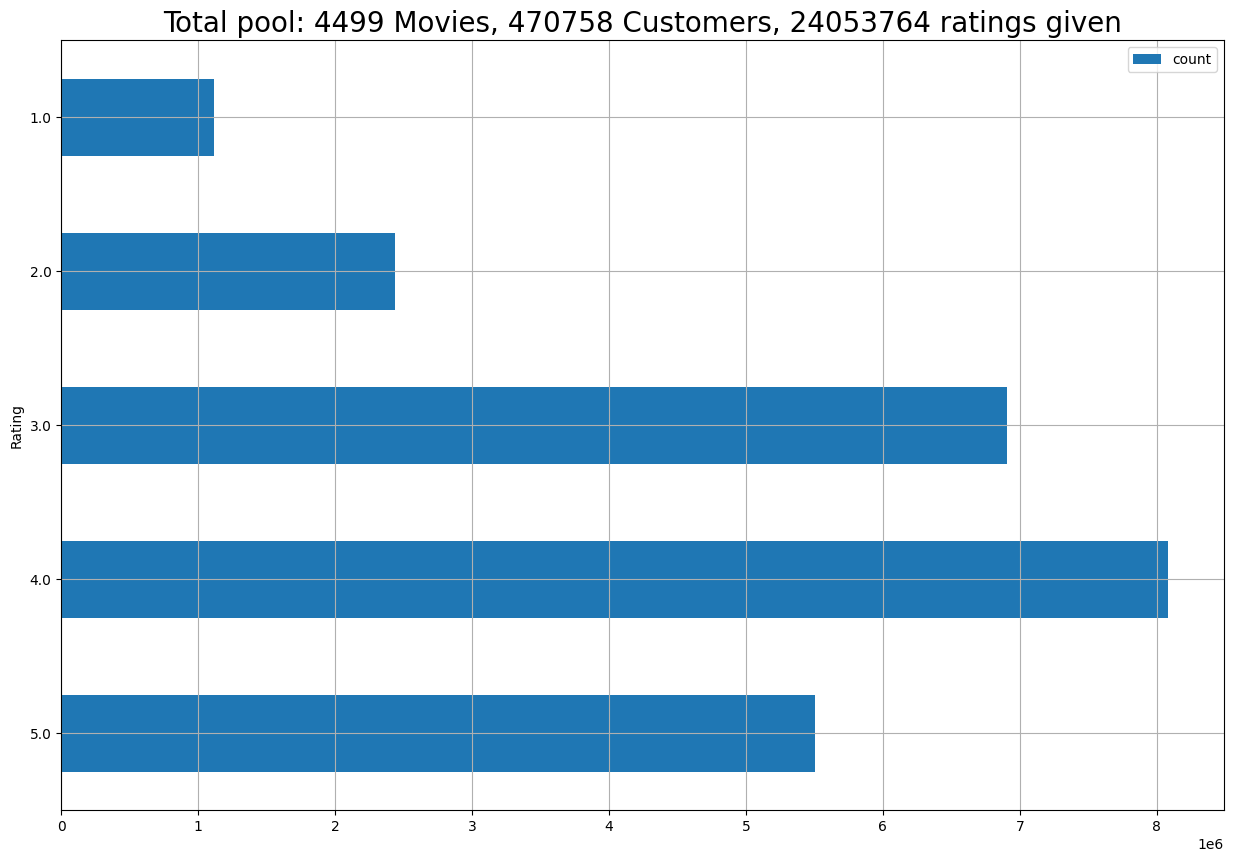

In [11]:
stars.plot(kind='barh', legend=True, figsize=(15,10))
plt.title(f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count} ratings given', fontsize=20)
plt.grid(True)

#### Handling Missing Values and Adding Movie ID Column

In [12]:
# Creating a DataFrame to identify rows with NaN values in the 'Rating' column
df_nan = pd.DataFrame(pd.isnull(netflix_dataset.Rating))

# Filtering the DataFrame to keep only the rows where 'Rating' is NaN
df_nan = df_nan[df_nan['Rating'] == True]

#now we will reset the index as the column
df_nan=df_nan.reset_index()

# Displaying the DataFrame containing rows with NaN ratings
df_nan

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


#### Creating an Array of Movie IDs

In [13]:
movie_np=[]
movie_id=1
for i, j in zip(df_nan['index'][1:], df_nan['index'][:-1]):
    temp=np.full((1, i-j-1), movie_id)
    movie_np=np.append(movie_np, temp)
    movie_id+=1


last_record=np.full((1, len(netflix_dataset)-df_nan.iloc[-1,0]-1), movie_id)
movie_np = np.append(movie_np, last_record)

#### Updating Dataset with Movie IDs and Customer IDs


In [14]:
# Dropping rows with NaN values in the dataset and updating the dataset in place
netflix_dataset.dropna(inplace = True)

# Adding a new column 'Movie_Id' to the dataset
netflix_dataset['Movie_Id']=movie_np.astype(int)

# Ensuring the 'Cust_Id' column is of integer type
netflix_dataset['Cust_Id']=netflix_dataset['Cust_Id'].astype(int)
netflix_dataset

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


#### Finding the Most Popular Movies

In [15]:
most_rated_movies = netflix_dataset['Movie_Id'].value_counts().reset_index()
top_rated_movies = most_rated_movies.sort_values(by='count', ascending=False).head(10)
print("Top 10 Most Rated Movies:\n")
print(top_rated_movies)

Top 10 Most Rated Movies:

   Movie_Id   count
0      1905  193941
1      2152  162597
2      3860  160454
3      4432  156183
4       571  154832
5      3938  153996
6      4306  151292
7      2452  149866
8      1962  145519
9      3962  140979


#### Analyzing Ratings : The highest and lowest-rated movies

In [16]:
movies_rating = netflix_dataset.groupby('Movie_Id')['Rating'].mean().reset_index().sort_values('Rating',ascending=False)

highest_rated_movies = movies_rating.head(10)
print("Top 10 Highest Rated Movies:\n")
print(highest_rated_movies)

print("")

# Analyzing the lowest-rated movies
lowest_rated_movies = movies_rating.sort_values(by='Rating').head(10)
print("Top 10 Lowest Rated Movies:\n")
print(lowest_rated_movies)

Top 10 Highest Rated Movies:

      Movie_Id    Rating
3455      3456  4.670989
3032      3033  4.586364
2101      2102  4.581296
4237      4238  4.554434
12          13  4.552000
3443      3444  4.516007
4426      4427  4.473692
1475      1476  4.469693
2018      2019  4.467500
1417      1418  4.464824

Top 10 Lowest Rated Movies:

      Movie_Id    Rating
514        515  1.287879
3574      3575  1.400000
2425      2426  1.452381
4201      4202  1.487395
1226      1227  1.496241
1568      1569  1.497758
624        625  1.505034
1724      1725  1.522137
3843      3844  1.600000
1790      1791  1.615385


#### Counting Customer,Movie Ratings and Setting Benchmark


In [17]:
dataset_movie_summary = netflix_dataset['Movie_Id'].value_counts().sort_index()

# Calculating the benchmark for movie ratings using the 60th percentile
movie_benchmark = round(dataset_movie_summary.quantile(0.6), 0)
movie_benchmark

908.0

In [18]:
# Grouping and counting ratings for each customer
dataset_cust_summary = netflix_dataset.groupby('Cust_Id')['Rating'].agg(["count"])

# Calculating the benchmark for customer activity using the 60th percentile
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.6), 0)
cust_benchmark

36.0

#### Filtering Out Low-Rated Movies and Inactive Customers

In [19]:
# Filtering out movies with counts below the calculated benchmark
drop_movie_list=dataset_movie_summary[dataset_movie_summary<movie_benchmark].index
drop_movie_list

Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
       ...
       4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_Id', length=2699)

In [20]:
# Identifying customers with fewer ratings than the calculated benchmark
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count'] < cust_benchmark].index
drop_cust_list

Index([      8,      25,      33,      83,      94,     126,     130,     133,
           142,     149,
       ...
       2649337, 2649343, 2649351, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='Cust_Id', length=282042)

#### Filtering the Dataset Based on Benchmarks

In [21]:
# Removing movies that fall below the movie benchmark
netflix_dataset=netflix_dataset[~netflix_dataset['Movie_Id'].isin(drop_movie_list)]

# Removing customers that fall below the customer benchmark
netflix_dataset=netflix_dataset[~netflix_dataset['Cust_Id'].isin(drop_cust_list)]
print('After the triming, the shape is: {}'.format(netflix_dataset.shape))

After the triming, the shape is: (19695836, 3)


In [22]:
netflix_dataset

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


In [23]:
df_title = pd.read_csv("/content/drive/MyDrive/movie_titles.csv",  encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['Movie_Id','Year','Name' ])
df_title.set_index('Movie_Id', inplace=True)

In [24]:
df_title.head(10)

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
6,1997.0,Sick
7,1992.0,8 Man
8,2004.0,What the #$*! Do We Know!?
9,1991.0,Class of Nuke 'Em High 2


#### Model Building Preparation

In [25]:
!pip install scikit-surprise

In [26]:
import math
import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [27]:
# Preparing the dataset for the SVD algorithm using the Surprise library
reader = Reader()

# Loading the top 100,000 rows from the Netflix dataset for quicker runtime
data = Dataset.load_from_df(netflix_dataset[['Cust_Id', 'Movie_Id', 'Rating']][:100000], reader)

# Initializing the SVD model for collaborative filtering
model = SVD()

# Performing cross-validation to evaluate the model using RMSE and MAE metrics across 4 folds
cross_validate(model, data, measures=['RMSE', 'MAE'], cv=4)


{'test_rmse': array([1.02802381, 1.02026333, 1.0203134 , 1.01818607]),
 'test_mae': array([0.80718811, 0.80532688, 0.79976067, 0.80620784]),
 'fit_time': (1.0716619491577148,
  1.8075957298278809,
  1.807361125946045,
  3.261699676513672),
 'test_time': (0.11166763305664062,
  0.3377223014831543,
  0.4589262008666992,
  0.5016345977783203)}

#### Generating Recommendations for a Specific User

In [28]:
# Filtering the Netflix dataset for a specific customer with Cust_Id 712664
netflix_dataset_cust = netflix_dataset[netflix_dataset['Cust_Id'] == 712664]

# Creating a copy of the movie titles DataFrame
user_712664 = df_title.copy()
user_712664 = user_712664.reset_index()

# Excluding movies that are below the benchmark threshold
user_712664 = user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]

# Estimating scores for each movie for the specific user using the trained SVD model
user_712664['Estimate_Score'] = user_712664['Movie_Id'].apply(lambda x: model.predict(712664, x).est)


In [29]:
user_712664.sort_values('Estimate_Score', ascending=False)

,Movie_Id,Year,Name,Estimate_Score
4,5,2004.0,The Rise and Fall of ECW,4.184006
17,18,1994.0,Immortal Beloved,4.166113
24,25,1997.0,Inspector Morse 31: Death Is Now My Neighbour,3.936664
2,3,1997.0,Character,3.936314
27,28,2002.0,Lilo and Stitch,3.811944
...,...,...,...,...
15,16,1996.0,Screamers,3.176524
16,17,2005.0,7 Seconds,2.974663
7,8,2004.0,What the #$*! Do We Know!?,2.814916
25,26,2004.0,Never Die Alone,2.787591


**User-Specific Recommendations**
- For Customer ID 712664:
 - Created a filtered dataset excluding movies that were below the popularity benchmark.
 - Estimated ratings for movies not rated by the customer using the trained SVD model.
 - Recommended top movies based on the highest estimated scores.

**Top Recommendations**
1. "The Rise and Fall of ECW" - Estimated Score: 4.271088
2. "Inspector Morse 31: Death Is Now My Neighbour" - Estimated Score: 4.270153
3. "Character" - Estimated Score: 3.873988
4. "Immortal Beloved" - Estimated Score: 3.795128
5. "Something's Gotta Give" - Estimated Score: 3.771800